In [1]:
import pandas as pd
import json
import re
from collections import Counter, OrderedDict

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
from nltk.tokenize import RegexpTokenizer

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
essayFile = pd.read_csv("essays.csv",encoding = "ISO-8859-1")

In [5]:
allNo = essayFile.loc[(essayFile.cEXT  == 'n') & (essayFile.cNEU == 'n') & (essayFile.cAGR == 'n') & (essayFile.cCON == 'n') & (essayFile.cOPN == 'n')]
EXT = essayFile.loc[(essayFile.cEXT  == 'y') & (essayFile.cNEU == 'n') & (essayFile.cAGR == 'n') & (essayFile.cCON == 'n') & (essayFile.cOPN == 'n')]
NEU = essayFile.loc[(essayFile.cEXT  == 'n') & (essayFile.cNEU == 'y') & (essayFile.cAGR == 'n') & (essayFile.cCON == 'n') & (essayFile.cOPN == 'n')]
AGR = essayFile.loc[(essayFile.cEXT  == 'n') & (essayFile.cNEU == 'n') & (essayFile.cAGR == 'y') & (essayFile.cCON == 'n') & (essayFile.cOPN == 'n')]
CON = essayFile.loc[(essayFile.cEXT  == 'n') & (essayFile.cNEU == 'n') & (essayFile.cAGR == 'n') & (essayFile.cCON == 'y') & (essayFile.cOPN == 'n')]
OPN = essayFile.loc[(essayFile.cEXT  == 'n') & (essayFile.cNEU == 'n') & (essayFile.cAGR == 'n') & (essayFile.cCON == 'n') & (essayFile.cOPN == 'y')]

In [6]:
noType = allNo['TEXT'].str.cat(sep=', ')
EXTtype = EXT['TEXT'].str.cat(sep=', ')
NEUtype = NEU['TEXT'].str.cat(sep=', ')
AGRtype = AGR['TEXT'].str.cat(sep=', ')
CONtype = CON['TEXT'].str.cat(sep=', ')
OPNtype = OPN['TEXT'].str.cat(sep=', ')

In [7]:
# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ') 
    return text

In [8]:
def word_count(lst):    
    clean = clean_text(lst)
    tokens = nltk.word_tokenize(clean)
    filtered_words = [word for word in tokens if word not in stopwords.words('english')]
    x = Counter(filtered_words)
    myDict = OrderedDict(x.most_common())
    return myDict

In [9]:
# Dictionary of words for each personality type
odNEU = word_count(NEUtype)
odCON = word_count(CONtype)
odAGR = word_count(AGRtype)
odEXT = word_count(EXTtype)
odOPN = word_count(OPNtype)
odNO = word_count(noType)

In [10]:
def unpackDict(d):
    myList = list(d.items())[:10]
    x, y = zip(*myList)
    return x, y

<BarContainer object of 10 artists>

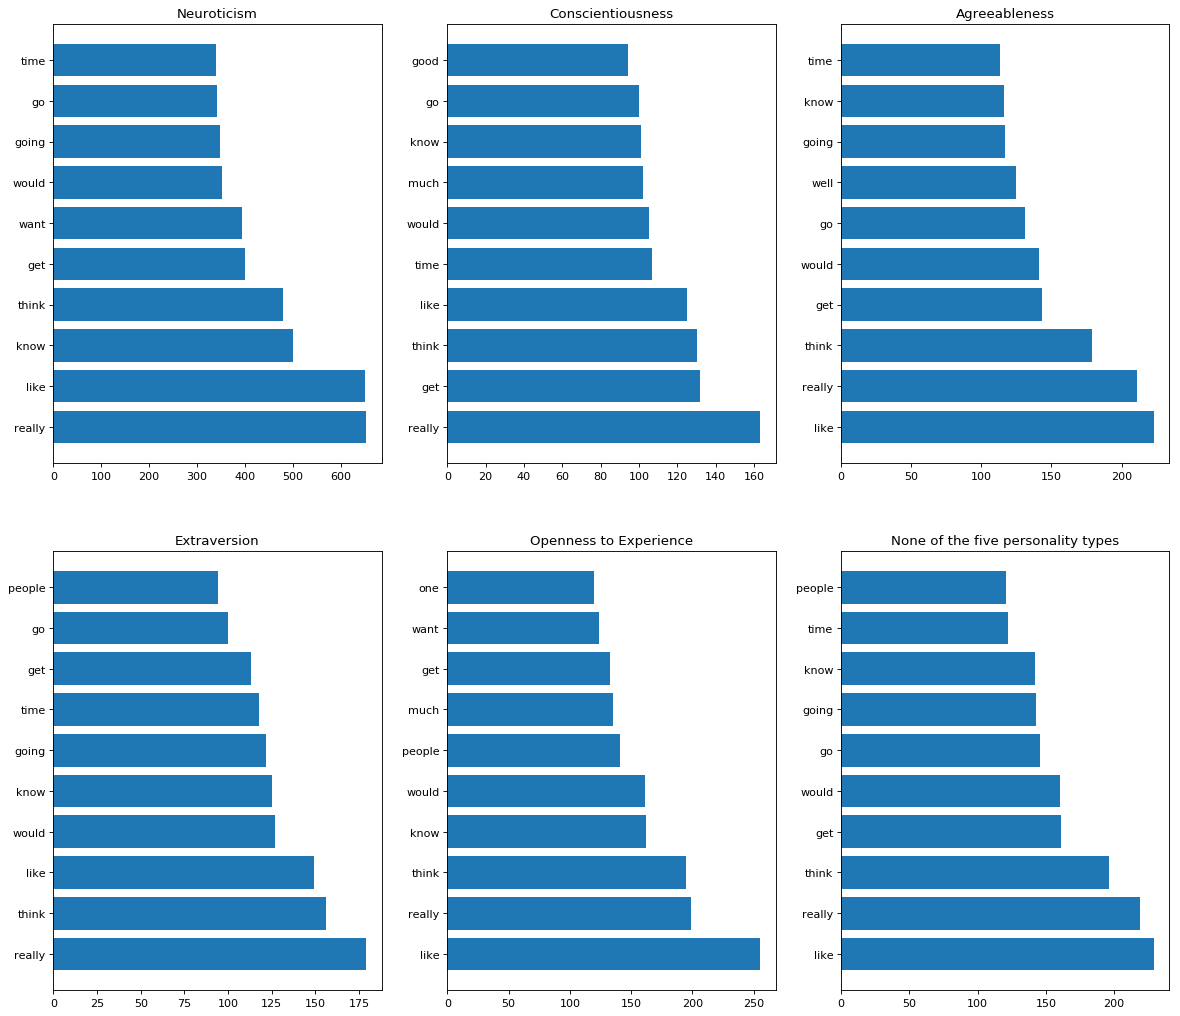

In [11]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax = plt.subplot(2, 3, 1)
ax.set_title('Neuroticism')
x, y = unpackDict(odNEU)
plt.barh(x, y)

ax = plt.subplot(2, 3, 2)
ax.set_title('Conscientiousness')
x, y = unpackDict(odCON)
plt.barh(x, y)

ax = plt.subplot(2, 3, 3)
ax.set_title('Agreeableness')
x, y = unpackDict(odAGR)
plt.barh(x, y)

ax = plt.subplot(2, 3, 4)
ax.set_title('Extraversion')
x, y = unpackDict(odEXT)
plt.barh(x, y)

ax = plt.subplot(2, 3, 5)
ax.set_title('Openness to Experience')
x, y = unpackDict(odOPN)
plt.barh(x, y)

ax = plt.subplot(2, 3, 6)
ax.set_title('None of the five personality types')
x, y = unpackDict(odNO)
plt.barh(x, y)